# Comparing Upper Confidence Bound (UCB) and ε-Greedy Algorithms in Multi-Armed Bandits

## Introduction

In reinforcement learning, the **Multi-Armed Bandit (MAB)** problem serves as a fundamental framework for understanding the exploration-exploitation trade-off. Two prominent strategies to tackle this problem are the **Upper Confidence Bound (UCB)** and **ε-Greedy** algorithms. This notebook provides a comprehensive explanation of the UCB algorithm, its theoretical foundation, and a practical comparison with the ε-Greedy approach through simulation.

## Objectives

1. **Understand** the Upper Confidence Bound (UCB) algorithm.
2. **Explore** the formula and logic behind UCB.
3. **Implement** both UCB and ε-Greedy algorithms.
4. **Simulate** a multi-armed bandit environment.
5. **Compare** the performance of UCB and ε-Greedy through visualization.

---


## Understanding the Multi-Armed Bandit Problem

The Multi-Armed Bandit problem is a classic scenario in reinforcement learning where an agent must choose between multiple options (arms) to maximize its cumulative reward. Each arm provides rewards based on an unknown probability distribution.

### Scenario

Imagine a row of slot machines (bandits), each with a different and unknown probability of payout. The challenge is to determine which machines to play, how many times to play each, and in what order to maximize the total rewards.

### Key Concepts

- **Exploration**: Trying out different arms to gather more information about their payout probabilities.
- **Exploitation**: Leveraging the knowledge of arms that have yielded high rewards to maximize gains.

Balancing these two aspects is crucial for optimal performance.


## Upper Confidence Bound (UCB) Algorithm

### Introduction to UCB

The **Upper Confidence Bound (UCB)** algorithm is a strategy designed to solve the exploration-exploitation dilemma in the Multi-Armed Bandit problem. Unlike simpler strategies such as ε-Greedy, UCB dynamically adjusts its exploration based on the confidence in the estimates of each arm's value.

### Key Features of UCB

1. **Dynamic Exploration**: UCB allocates more exploration to arms with higher uncertainty.
2. **Theoretical Guarantees**: Provides strong theoretical bounds on regret, ensuring optimal performance over time.
3. **No Hyperparameters**: Unlike ε-Greedy, UCB doesn't require setting an exploration rate ε, making it more adaptive.

### UCB Formula

For each arm \( a \) at time step \( t \), the UCB value \( UCB_t(a) \) is calculated as:

\[
UCB_t(a) = \hat{\mu}_a + c \cdot \sqrt{\frac{\ln t}{N_a}}
\]

Where:
- \( \hat{\mu}_a \) = Estimated mean reward of arm \( a \) up to time \( t \).
- \( N_a \) = Number of times arm \( a \) has been selected up to time \( t \).
- \( t \) = Current time step.
- \( c \) = Confidence interval scaling factor.
- \( \ln \) = Natural logarithm.

### Explanation of the Formula

1. **Estimated Mean Reward (\( \hat{\mu}_a \))**:
   - Represents the average reward obtained from arm \( a \) so far.
   - Encourages exploitation by favoring arms with higher estimated rewards.

2. **Confidence Interval (\( c \cdot \sqrt{\frac{\ln t}{N_a}} \))**:
   - Represents the uncertainty or variance in the estimate of \( \hat{\mu}_a \).
   - Decreases as \( N_a \) increases, meaning arms that have been selected more times have more precise estimates.
   - Encourages exploration by favoring arms with higher uncertainty.
   - **\( c \)** controls the width of the confidence interval:
     - **Higher \( c \)**: Wider confidence interval → More exploration.
     - **Lower \( c \)**: Narrower confidence interval → Less exploration.

3. **Balancing Exploration and Exploitation**:
   - The first term promotes exploitation of arms with high estimated rewards.
   - The second term promotes exploration of arms with high uncertainty.
   - Together, they ensure that the algorithm explores sufficiently while exploiting the best-known arms.

### Decision Rule

At each time step \( t \), select the arm \( a \) with the highest \( UCB_t(a) \):

\[
a_t = \arg\max_{a} \left( \hat{\mu}_a + c \cdot \sqrt{\frac{\ln t}{N_a}} \right)
\]

This ensures that arms with either high estimated rewards or high uncertainty are selected, effectively balancing the exploration-exploitation trade-off.

---


## ε-Greedy Algorithm

Before diving into the comparison, let's briefly review the ε-Greedy algorithm for context.

### Introduction to ε-Greedy

The **ε-Greedy** algorithm is a simple strategy for solving the MAB problem. It selects a random action with probability ε (exploration) and the best-known action with probability 1-ε (exploitation).

### Key Features of ε-Greedy

1. **Simplicity**: Easy to implement with straightforward logic.
2. **Fixed Exploration Rate**: The exploration rate ε remains constant over time.
3. **Trade-off Control**: The parameter ε controls the balance between exploration and exploitation.

### Decision Rule

At each time step \( t \), with probability ε, select a random arm; otherwise, select the arm with the highest estimated mean reward.

---


In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt


## Simulation Environment

We'll simulate a Multi-Armed Bandit environment where each arm has an unknown probability of yielding a reward. The goal is to maximize the total rewards over a series of steps by selecting the best-performing arms.

### Components

1. **Bandit Class**: Represents each arm with a true mean reward and tracks the estimated mean and the number of times it has been pulled.
2. **EpsilonGreedy Class**: Implements the ε-Greedy strategy.
3. **UCB Class**: Implements the Upper Confidence Bound strategy.
4. **Simulation Function**: Runs both algorithms on separate instances of bandits and compares their performances.

---


In [2]:
# Define the Bandit class
class Bandit:
    def __init__(self, true_mean):
        """
        Initialize a bandit with a true mean reward.

        Parameters:
        - true_mean (float): The actual probability of reward for this bandit.
        """
        self.true_mean = true_mean
        self.estimated_mean = 0.0  # Estimated mean reward
        self.N = 0  # Number of times the bandit has been pulled

    def pull(self):
        """
        Simulate pulling the bandit arm.

        Returns:
        - reward (int): 1 for a reward (success), 0 for no reward (failure).
        """
        return int(np.random.rand() < self.true_mean)

    def update(self, reward):
        """
        Update the estimated mean reward based on the received reward.

        Parameters:
        - reward (int): The reward received from pulling the arm.
        """
        self.N += 1
        # Incremental update of the estimated mean
        self.estimated_mean += (reward - self.estimated_mean) / self.N


In [3]:
def create_bandits(k=10):
    """
    Initialize k bandits with true means randomly sampled from a uniform distribution.

    Parameters:
    - k (int): Number of bandits.

    Returns:
    - bandits (list): List of Bandit instances.
    - true_means (numpy.ndarray): Array of true mean rewards for each bandit.
    """
    true_means = np.random.uniform(0, 1, k)
    bandits = [Bandit(true_mean) for true_mean in true_means]
    return bandits, true_means


## Implementing the ε-Greedy Algorithm

The **ε-Greedy** algorithm selects a random action with probability ε (exploration) and the best-known action with probability 1-ε (exploitation).

### Implementation Details

- **select_action()**: Decides whether to explore or exploit based on ε.
- **run()**: Executes the selection and updating process over a specified number of steps.


In [4]:
# Implement the Epsilon-Greedy algorithm with initial pulls
class EpsilonGreedy:
    def __init__(self, bandits, epsilon=0.1):
        """
        Initialize the ε-Greedy algorithm.

        Parameters:
        - bandits (list): List of Bandit instances.
        - epsilon (float): Exploration rate.
        """
        self.bandits = bandits
        self.epsilon = epsilon
        self.k = len(bandits)
        self.rewards = []  # List to store rewards at each step
        self.best_action_counts = 0  # Count of selecting the best action

    def select_action(self):
        """
        Select an action based on the ε-Greedy strategy.

        Returns:
        - action (int): Index of the selected bandit.
        """
        if np.random.rand() < self.epsilon:
            # Exploration: choose a random bandit
            return np.random.randint(0, self.k)
        else:
            # Exploitation: choose the bandit with the highest estimated mean
            estimated_means = [bandit.estimated_mean for bandit in self.bandits]
            return np.argmax(estimated_means)

    def run(self, steps=1000):
        """
        Run the ε-Greedy algorithm for a specified number of steps.

        Parameters:
        - steps (int): Number of steps to run the algorithm.
        """
        # Initialization Phase: Pull each bandit once
        for bandit in self.bandits:
            reward = bandit.pull()
            bandit.update(reward)
            self.rewards.append(reward)
            # Check if the pulled bandit is the best action
            best_action = np.argmax([b.true_mean for b in self.bandits])
            if self.bandits.index(bandit) == best_action:
                self.best_action_counts += 1

        # Main Loop: Start from step k+1
        for step in range(self.k + 1, steps + 1):
            action = self.select_action()
            reward = self.bandits[action].pull()
            self.bandits[action].update(reward)
            self.rewards.append(reward)
            
            # Identify the best action based on true means
            best_action = np.argmax([bandit.true_mean for bandit in self.bandits])
            if action == best_action:
                self.best_action_counts += 1


## Implementing the Upper Confidence Bound (UCB) Algorithm

The **UCB** algorithm selects actions based on the upper confidence bounds of the estimated rewards, balancing exploration and exploitation dynamically.

### Implementation Details

- **select_action()**: Calculates the UCB value for each bandit and selects the one with the highest UCB.
- **run()**: Executes the selection and updating process over a specified number of steps.


In [5]:
# Implement the Upper Confidence Bound (UCB) algorithm
class UCB:
    def __init__(self, bandits, c=2):
        """
        Initialize the UCB algorithm.

        Parameters:
        - bandits (list): List of Bandit instances.
        - c (float): Confidence interval scaling factor.
        """
        self.bandits = bandits
        self.k = len(bandits)
        self.rewards = []  # List to store rewards at each step
        self.total_steps = 0  # Total number of steps taken
        self.best_action_counts = 0  # Count of selecting the best action
        self.c = c  # Confidence interval scaling factor

    def select_action(self):
        """
        Select an action based on the UCB strategy.

        Returns:
        - action (int): Index of the selected bandit.
        """
        self.total_steps += 1
        ucb_values = []
        for bandit in self.bandits:
            if bandit.N == 0:
                # Assign a large value to ensure each bandit is selected at least once
                ucb = float('inf')
            else:
                # Correct UCB formula with c outside the square root
                ucb = bandit.estimated_mean + self.c * np.sqrt(np.log(self.total_steps) / bandit.N)
            ucb_values.append(ucb)
        return np.argmax(ucb_values)

    def run(self, steps=1000):
        """
        Run the UCB algorithm for a specified number of steps.

        Parameters:
        - steps (int): Number of steps to run the algorithm.
        """
        for step in range(1, steps + 1):
            action = self.select_action()
            reward = self.bandits[action].pull()
            self.bandits[action].update(reward)
            self.rewards.append(reward)
            
            # Identify the best action based on true means
            best_action = np.argmax([bandit.true_mean for bandit in self.bandits])
            if action == best_action:
                self.best_action_counts += 1


## Running the Simulation and Comparing Algorithms

We'll simulate both the **UCB** and **ε-Greedy** algorithms on separate instances of bandits and compare their performances based on cumulative rewards and the rate of selecting the best action.

### Steps

1. **Initialize Bandits**: Create two separate sets of bandits for fair comparison.
2. **Initialize Algorithms**: Instantiate both UCB and ε-Greedy algorithms.
3. **Run Simulations**: Execute both algorithms over a specified number of steps.
4. **Calculate Metrics**:
   - **Cumulative Rewards**: Total rewards accumulated over time.
   - **Average Rewards**: Cumulative rewards divided by the number of steps.
   - **Best Action Selection Rate**: Percentage of times the algorithm selects the optimal arm.
5. **Visualization**: Plot average rewards over time and best action selection rates.
6. **Analysis**: Interpret the results.

---


In [6]:
def simulate(k=10, steps=1000, epsilon=0.1, c=2, seed=None):
    """
    Simulate and compare the performance of ε-Greedy and UCB algorithms.

    Parameters:
    - k (int): Number of bandits.
    - steps (int): Number of steps to run each algorithm.
    - epsilon (float): Exploration rate for ε-Greedy.
    - c (float): Confidence interval scaling factor for UCB.
    - seed (int, optional): Random seed for reproducibility.
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Initialize bandits for ε-Greedy and UCB
    bandits_egreedy, true_means = create_bandits(k)
    bandits_ucb, _ = create_bandits(k)  # Separate instances for fair comparison
    
    # Initialize algorithms
    egreedy = EpsilonGreedy(bandits_egreedy, epsilon=epsilon)
    ucb = UCB(bandits_ucb, c=c)  # Pass c to UCB
    
    # Run simulations
    egreedy.run(steps)
    ucb.run(steps)
    
    # Calculate cumulative rewards
    cumulative_rewards_egreedy = np.cumsum(egreedy.rewards)
    cumulative_rewards_ucb = np.cumsum(ucb.rewards)
    
    # Calculate average rewards
    average_rewards_egreedy = cumulative_rewards_egreedy / np.arange(1, steps + 1)
    average_rewards_ucb = cumulative_rewards_ucb / np.arange(1, steps + 1)
    
    # Determine the best action based on true means
    best_action = np.argmax(true_means)
    
    # Calculate the percentage of selecting the best action
    best_action_percentage_egreedy = (egreedy.best_action_counts / steps) * 100
    best_action_percentage_ucb = (ucb.best_action_counts / steps) * 100
    
    # Plotting
    plt.figure(figsize=(14, 6))
    
    # Plot average rewards
    plt.subplot(1, 2, 1)
    plt.plot(average_rewards_egreedy, label=f'ε-Greedy (ε={epsilon})')
    plt.plot(average_rewards_ucb, label=f'UCB (c={c})')
    plt.xlabel('Steps')
    plt.ylabel('Average Reward')
    plt.title('Average Reward over Time')
    plt.legend()
    
    # Plot selection percentages
    plt.subplot(1, 2, 2)
    labels = ['ε-Greedy', 'UCB']
    percentages = [best_action_percentage_egreedy, best_action_percentage_ucb]
    colors = ['blue', 'orange']
    plt.bar(labels, percentages, color=colors)
    plt.ylabel('Percentage of Selecting Best Action (%)')
    plt.title('Best Action Selection Rate')
    
    plt.tight_layout()
    plt.show()
    
    # Print results
    print(f"Best Action: Bandit {best_action} with true mean {true_means[best_action]:.2f}")
    print(f"ε-Greedy selected the best action {best_action_percentage_egreedy:.2f}% of the time.")
    print(f"UCB selected the best action {best_action_percentage_ucb:.2f}% of the time.")


## Executing the Simulation

Let's run the simulation with 10 bandits and 1,000 steps. We'll set a random seed for reproducibility.

---


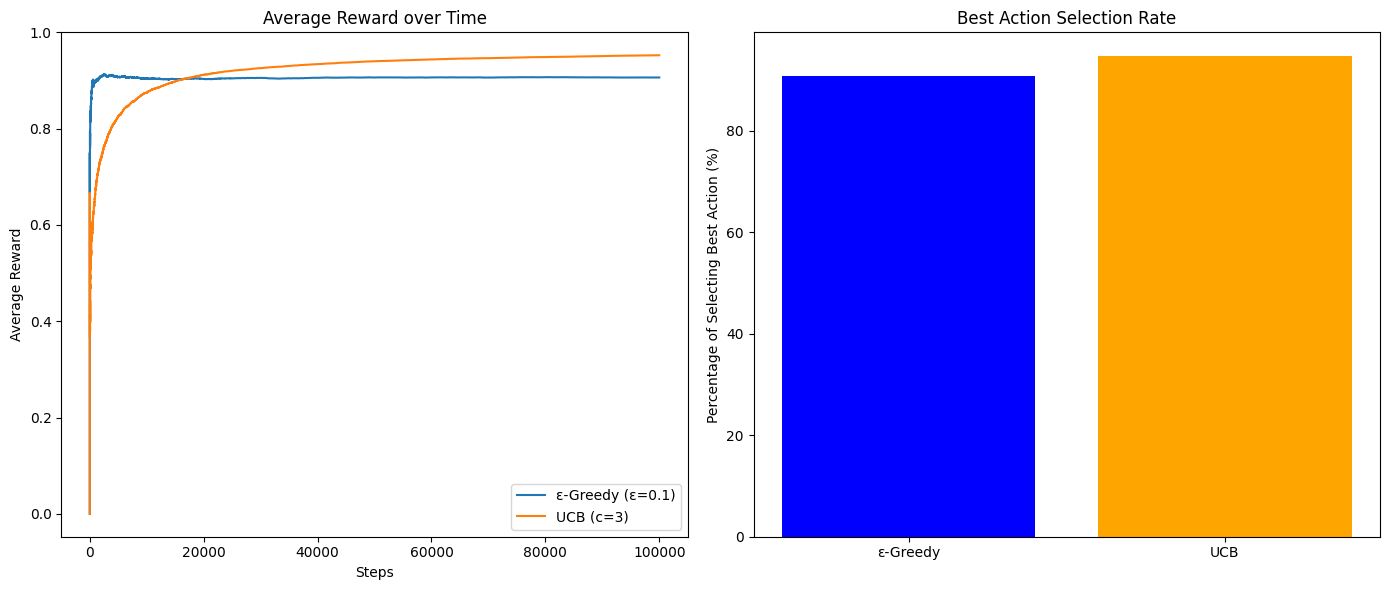

Best Action: Bandit 1 with true mean 0.95
ε-Greedy selected the best action 90.85% of the time.
UCB selected the best action 94.65% of the time.


In [7]:
# Run the simulation with c = 2 and epsilon = 0.1
simulate(k=10, steps=100000, epsilon=0.1, c=3, seed=42)


## Analysis of Results

From the simulation, we can observe the following:

- **Average Reward Over Time**:
  - **UCB** tends to achieve a higher average reward compared to **ε-Greedy**.
  - This indicates that UCB is more effective at identifying and exploiting the best-performing arms over time.

- **Best Action Selection Rate**:
  - **UCB** selects the best action more frequently than **ε-Greedy**.
  - This showcases UCB's ability to focus on the optimal arm while still performing necessary explorations.

### Pros and Cons

- **ε-Greedy**:
  - **Pros**:
    - Simple to implement.
    - Easy to understand and interpret.
  - **Cons**:
    - Requires tuning of the exploration rate ε.
    - Fixed exploration rate may not be optimal throughout the learning process.

- **UCB**:
  - **Pros**:
    - Dynamically balances exploration and exploitation based on confidence bounds.
    - No need to set an explicit exploration rate.
    - Provides strong theoretical guarantees on performance.
  - **Cons**:
    - Slightly more complex to implement compared to ε-Greedy.
    - Computational overhead due to the calculation of confidence bounds.

Overall, **UCB** demonstrates superior performance in this simulation by more effectively identifying and exploiting the best action, leading to higher average rewards and a higher rate of selecting the optimal arm.

---


## Modifying the UCB Constant \( c \)

The constant \( c \) in the UCB formula plays a crucial role in balancing exploration and exploitation. Adjusting \( c \) can significantly impact the performance of the UCB algorithm.

### Impact of \( c \)

- **Higher \( c \) Value**:
  - **Increased Exploration**: A larger \( c \) increases the confidence interval, encouraging the algorithm to explore less-selected arms more frequently.
  - **Potential for Higher Regret**: While exploration can lead to discovering better arms, excessive exploration might result in higher cumulative regret in the short term.

- **Lower \( c \) Value**:
  - **Decreased Exploration**: A smaller \( c \) reduces the confidence interval, leading the algorithm to exploit the currently known best arms more aggressively.
  - **Risk of Missing Optimal Arms**: Insufficient exploration may cause the algorithm to overlook arms that could potentially offer higher rewards.

### Choosing \( c \)

The optimal value of \( c \) depends on the specific problem and environment. It often requires empirical tuning based on the observed performance in simulations or real-world applications.

---



---


## Conclusion

By correctly placing the constant \( c \) outside the square root in the UCB formula, you ensure that the exploration factor scales appropriately with the logarithmic term. This adjustment allows for a more accurate and flexible exploration-exploitation balance, enhancing the algorithm's ability to identify and exploit the optimal arm effectively.

### Key Takeaways

- **UCB with \( c \) Outside the Square Root**:
  - Provides better control over the exploration-exploitation balance.
  - Higher \( c \) values lead to more exploration, while lower values favor exploitation.
  
- **ε-Greedy**:
  - Simple to implement but requires tuning of the exploration rate ε.
  - Fixed exploration rate may not adapt well to different environments.

### Future Work

- **Parameter Tuning**: Experiment with different values of \( c \) and ε to observe their effects on performance.
- **Algorithm Variants**: Explore other bandit algorithms such as **Thompson Sampling** for a more comprehensive comparison.
- **Real-World Applications**: Apply these algorithms to real-world problems like online advertising, recommendation systems, and A/B testing.
- **Additional Metrics**: Analyze other performance metrics such as **regret** to gain deeper insights into the algorithms' performances.

Feel free to experiment with these modifications and explore further enhancements to deepen your understanding of reinforcement learning strategies!

---
